In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = False

data = pd.read_csv('empreinteCarboneDeplacementDT_2022121.tsv', sep='\t')
data

,seqID,Jours de déplacement,Statut,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),...,Vélo électrique (kg eCO2),trottinette électrique (kg eCO2),2 roues motorisées (kg eCO2),Voiture (kg eCO2),Bus (kg eCO2),Tramway (kg eCO2),Train (kg eCO2),RER (kg eCO2),Métro (kg eCO2),Total (kg eCO2)
0,52392,5,researcher,0,12,0,0,0,0,0,...,0,0,0,0,0,0,258,0,0,271
1,52393,3,researcher,0,0,0,0,0,138,0,...,0,0,0,4772,0,0,0,0,0,4772
2,52394,5,researcher,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
3,52395,5,engineer,0,18,0,0,0,0,0,...,0,0,0,85,0,0,0,0,0,100
4,52396,5,researcher,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,52807,3,researcher,0,0,0,0,0,80,0,...,0,0,0,1799,0,0,0,0,0,1799
117,52808,5,researcher,0,0,0,0,0,80,0,...,0,0,0,2998,0,0,0,0,0,2998
118,52809,5,researcher,0,0,0,0,0,8,0,...,0,0,134,113,0,0,0,0,0,248
119,53008,4,engineer,0,0,0,0,5,0,0,...,0,0,168,0,0,0,0,0,0,168


In [2]:
colnames = np.array(data.columns)
colnames

array(['seqID', 'Jours de déplacement', 'Statut', 'Marche JT1 (Km)',
       'Vélo JT1 (Km)', 'Vélo électrique JT1 (Km)',
       'trottinette électrique JT1 (Km)', '2 roues motorisées JT1 (Km)',
       'Voiture JT1 (Km)', 'Bus JT1 (Km)', 'Tramway JT1 (Km)',
       'Train JT1 (Km)', 'RER JT1 (Km)', 'Métro JT1 (Km)', 'Jours JT2',
       'Marche JT2 (Km)', 'Vélo JT2 (Km)', 'Vélo électrique JT2 (Km)',
       'trottinette électrique JT2 (Km)', '2 roues motorisées JT2 (Km)',
       'Voiture JT2 (Km)', 'Bus JT2 (Km)', 'Tramway JT2 (Km)',
       'Train JT2 (Km)', 'RER JT2 (Km)', 'Métro JT2 (Km)',
       'Marche (kg eCO2)', 'Vélo (kg eCO2)', 'Vélo électrique (kg eCO2)',
       'trottinette électrique (kg eCO2)', '2 roues motorisées (kg eCO2)',
       'Voiture (kg eCO2)', 'Bus (kg eCO2)', 'Tramway (kg eCO2)',
       'Train (kg eCO2)', 'RER (kg eCO2)', 'Métro (kg eCO2)',
       'Total (kg eCO2)'], dtype=object)

## Extract the types of transportation

In [3]:
pattern = '(.*) JT1.*'
types = []
regexp = re.compile(pattern)
for t in colnames:
    test = regexp.match(t)
    if(test):
        types.append(test.groups()[0])
types

['Marche',
 'Vélo',
 'Vélo électrique',
 'trottinette électrique',
 '2 roues motorisées',
 'Voiture',
 'Bus',
 'Tramway',
 'Train',
 'RER',
 'Métro']

## Summing JT1 and JT2 values

In [15]:
jours_jt2 = data['Jours JT2']
jours_jt2

0      0
1      1
2      0
3      1
4      0
      ..
116    0
117    0
118    2
119    0
120    0
Name: Jours JT2, Length: 121, dtype: int64

In [16]:
jours_jt1 = data['Jours de déplacement'] - jours_jt2
data['Jours JT1'] = jours_jt1
data.loc[:, ['Jours de déplacement', 'Jours JT1', 'Jours JT2']]

,Jours de déplacement,Jours JT1,Jours JT2
0,5,5,0
1,3,2,1
2,5,5,0
3,5,4,1
4,5,5,0
...,...,...,...
116,3,3,0
117,5,5,0
118,5,3,2
119,4,4,0


In [17]:
for t in types[:]:
    pattern = '%s JT[1-2] \(Km\)' %t
    regexp = re.compile(pattern)
    test = np.array([(regexp.match(c) is not None) & ('Km' in c) for c in colnames])
    icol = np.nonzero(test)[0]
    temp = data.iloc[:, icol]
    output = data.iloc[:, icol[0]].values * jours_jt1.values + data.iloc[:, icol[1]].values * jours_jt2.values
    data['%s (Km)' %t] = output
data.iloc[:, icol[0]], data.iloc[:, icol[1]]

(0      0
 1      0
 2      0
 3      0
 4      0
       ..
 116    0
 117    0
 118    0
 119    0
 120    0
 Name: Métro JT1 (Km), Length: 121, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 116    0
 117    0
 118    0
 119    0
 120    0
 Name: Métro JT2 (Km), Length: 121, dtype: int64)

## Plotting pie charts

In [18]:
test = data.sum(axis=0)
test

seqID                                                                         6354763
Jours de déplacement                                                              544
Statut                              researcherresearcherresearcherengineerresearch...
Marche JT1 (Km)                                                                    32
Vélo JT1 (Km)                                                                     492
Vélo électrique JT1 (Km)                                                           45
trottinette électrique JT1 (Km)                                                     0
2 roues motorisées JT1 (Km)                                                        59
Voiture JT1 (Km)                                                                 2565
Bus JT1 (Km)                                                                       55
Tramway JT1 (Km)                                                                   29
Train JT1 (Km)                                        

In [19]:
distance = []
distance_cols = []
for t in types:
    temp = '%s (Km)' %t
    distance_cols.append(temp)
    distance.append(test[temp])

In [20]:
emissions = []
emissions_cols = []
for t in types:
    temp = '%s (kg eCO2)' %t
    emissions_cols.append(temp)
    emissions.append(test[temp])

In [21]:
cmap = plt.cm.Spectral
ntypes = len(types)
colors = []
for i in range(0, ntypes):
    iii = (i) /  (ntypes - 1)
    colors.append(cmap(iii))

In [22]:
fig = plt.figure(figsize=(12, 12), facecolor='white')
p, t = plt.pie(distance, labels=None, colors=colors, wedgeprops={'edgecolor': 'k', 'linewidth': 1})
plt.legend(p, types, ncol=len(types) // 3, loc='best')
plt.title('Distance (km)')
plt.savefig('deplacement_distance.png')
plt.close(fig)

In [23]:
fig = plt.figure(figsize=(12, 12), facecolor='white')
p, t = plt.pie(emissions, labels=None, colors=colors, wedgeprops={'edgecolor': 'k', 'linewidth': 1})
plt.legend(p, types, ncol=len(types) // 3, loc='best')
plt.title('Emissions (kg eCO2)')
plt.savefig('deplacement_emissions.png')
plt.close(fig)

## Plotting 1.5 bar plot

In [24]:
test = data.groupby('Statut').sum()
test = test.loc[['researcher', 'engineer', 'student'], :]
test

,seqID,Jours de déplacement,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),Tramway JT1 (Km),...,Vélo (Km),Vélo électrique (Km),trottinette électrique (Km),2 roues motorisées (Km),Voiture (Km),Bus (Km),Tramway (Km),Train (Km),RER (Km),Métro (Km)
Statut,,,,,,,,,,,,,,,,,,,,,
researcher,3518514,292,7,292,15,0,4,1780,5,4,...,1092,30,8,36,7208,25,16,3125,0,0
engineer,2206490,195,2,148,22,0,55,756,35,5,...,601,82,0,270,3656,183,25,586,85,0
student,629759,57,23,52,8,0,0,29,15,20,...,225,40,0,0,166,75,80,0,0,0


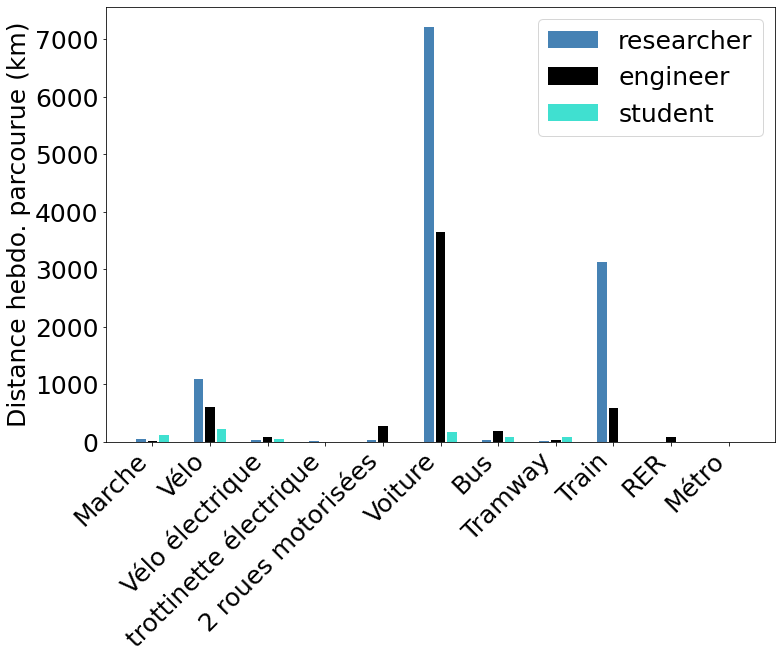

In [29]:
fig = plt.figure(facecolor='white', figsize=(12, 8))
plt.rcParams['font.size'] = 25
ax = plt.gca()
colors = ['steelblue', 'black', 'turquoise']
x = np.array([0, 3, 6])
offset = 15
width = 2.5
xlabels = []
for c in distance_cols:
    l = plt.bar(x, test[c], width=width, color=colors)
    xlabels.append(x[1])
    x += offset

ax.set_xticks(xlabels)
ax.set_xticklabels(types, ha='right', rotation=45)
plt.ylabel('Distance hebdo. parcourue (km)')

plt.legend(l, test.index)